In [19]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt

In [16]:

workbook = openpyxl.load_workbook('2016/Dengue form-2016_Modified.xlsx')

# Loop through each worksheet
for sheet_name in workbook.sheetnames:
    # Check if the sheet name ends with a parenthesis
    if sheet_name.endswith(')'):
        # Get the sheet object and rename it without the last parenthesis
        worksheet = workbook[sheet_name]
        new_sheet_name = sheet_name[:-1]
        worksheet.title = new_sheet_name
        
        # Update the cell values in the worksheet
        for row in worksheet.iter_rows():
            last_cell_value = row[-1].value
            if isinstance(last_cell_value, str) and last_cell_value.endswith(')'):
                row[-1].value = last_cell_value[:-1]

# Save the changes to the Excel file
workbook.save('2016/Dengue form-2016_M.xlsx')

In [20]:
#The usage of the function whene the row range is double

def double_range_extract(start_col : int, end_col: int, start_row1: int, end_row1: int, start_row2: int, end_row2: int, type:str, area: str, csv_name:str,path:str):
    # Create an empty list to store the results
    dfs = []
    workbook = openpyxl.load_workbook(path)
    
    
    
    type_df = type
    
    area_df = area

   
    for sheet_name in workbook.sheetnames:
        worksheet = workbook[sheet_name]
        sheet = sheet_name.replace(")","")
        sheet = sheet.replace(".","-")
        # sheet = sheet[:-3]
        sheet = sheet.replace(" ", "")
#         if sheet.endswith('-'):
#             sheet = sheet[:-1]
#         else:
#             sheet = sheet
            
#         if "--" in sheet:
#             sheet = sheet.replace("--", "-")
#         else:
#             sheet = sheet
        
        print(worksheet)
        print(sheet)
        
    
        
         # Initialize the sum to 0
            # Initialize the sum to 0
        total_sum = 0

        # Loop over each row in the first range
        for row in worksheet.iter_rows(min_row=start_row1, max_row=end_row1):

            # Loop over each cell in the row
            for cell in row:

                # Check if the cell is within the specified column range
                if start_col <= cell.column <= end_col:

                    # Check if the cell value is a number
                    if isinstance(cell.value, (int, float)):
                        # Add the value of the cell to the total sum
                        total_sum += cell.value

        # Loop over each row in the second range
        for row in worksheet.iter_rows(min_row=start_row2, max_row=end_row2):

            # Loop over each cell in the row
            for cell in row:

                # Check if the cell is within the specified column range
                if start_col <= cell.column <= end_col:

                    # Check if the cell value is a number
                    if isinstance(cell.value, (int, float)):
                        # Add the value of the cell to the total sum
                        total_sum += cell.value

        # # Return the total sum
        # return total_sum
        





        # Append the results to a new DataFrame for this sheet
        df = pd.DataFrame({'date': [sheet], type_df: [total_sum], 'Area': [area_df]})

        dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    result_df = pd.concat(dfs, ignore_index=True)
    
    result_df = result_df[:-1]
    print(result_df.size)
    result_df['date'] = result_df['date'] 
    result_df["date"] = pd.to_datetime(result_df["date"], format="%d-%m-%y")
    result_df.to_csv(csv_name)
    print(csv_name)
    


In [18]:
double_range_extract(start_col = 3, end_col= 5, start_row1= 18, end_row1= 30, start_row2= 60, end_row2=92, type = 'Infected_Cases', area= 'Dhaka', csv_name='CSV/2016/Dhaka_infected_dengue.csv',path="2016/Dengue form-2016_M.xlsx")

<Worksheet "01.01.16">
01-01-16
<Worksheet "02.01.16">
02-01-16
<Worksheet "03.01.16">
03-01-16
<Worksheet "04.01.16 ">
04-01-16
<Worksheet "05.01.16">
05-01-16
<Worksheet "06.01.16">
06-01-16
<Worksheet "07.01.16">
07-01-16
<Worksheet "08.01.16">
08-01-16
<Worksheet "09.01.16">
09-01-16
<Worksheet "10.01.16">
10-01-16
<Worksheet "11.01.16">
11-01-16
<Worksheet "12.01.16">
12-01-16
<Worksheet "13.01.16">
13-01-16
<Worksheet "14.01.16">
14-01-16
<Worksheet "15.01.16">
15-01-16
<Worksheet "16.01.16">
16-01-16
<Worksheet "17.01.16">
17-01-16
<Worksheet "18.01.16">
18-01-16
<Worksheet "19.01.16">
19-01-16
<Worksheet "20.01.16">
20-01-16
<Worksheet "21.01.16">
21-01-16
<Worksheet "22.01.16">
22-01-16
<Worksheet "23.01.16">
23-01-16
<Worksheet "24.01.16">
24-01-16
<Worksheet "25.01.16">
25-01-16
<Worksheet "26.01.16">
26-01-16
<Worksheet "27.01.16">
27-01-16
<Worksheet "28.01.16 ">
28-01-16
<Worksheet "29.01.16">
29-01-16
<Worksheet "30.01.16">
30-01-16
<Worksheet "31.01.16">
31-01-16
<Works

In [21]:
def visual(csv_path: str ):
    # Load data into a DataFrame
    df = pd.read_csv(csv_path, parse_dates=['date'], index_col='date')
    # Create a plot of total infected cases over time
    ax = df.plot(y=df.columns[1], legend=False)
    ax.set_xlabel('Date')
    ax.set_ylabel(df.columns[1])
    ax.set_title(f'Total Dengue {df.columns[1]} Cases in {df[df.columns[2]].unique()} Inner Over Time')
    plt.show()

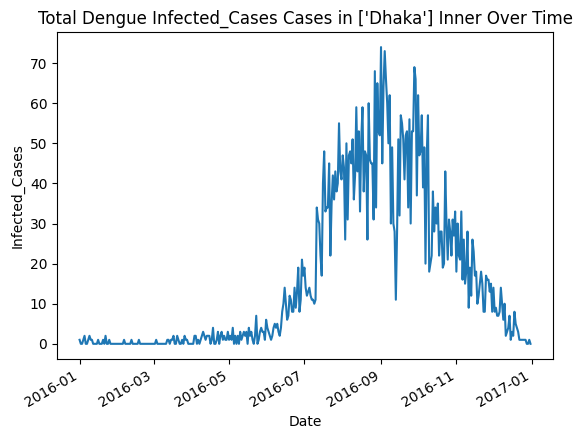

In [22]:
visual('CSV/2016/Dhaka_infected_dengue.csv')

In [28]:
#The usage of the function whene the row range is single

def single_range_extract(start_col: int, end_col: int, start_row: int, end_row: int, type:str, area: str, csv_name:str, path:str):
    # Create an empty list to store the results
    dfs = []
    workbook = openpyxl.load_workbook(path)
    
    type_df = type
    
    area_df = area

   
    for sheet_name in workbook.sheetnames:
        worksheet = workbook[sheet_name]
        sheet = sheet_name.replace(")","")
        sheet = sheet.replace(".","-")
        # sheet = sheet[:-3]
        sheet = sheet.replace(" ", "")
         # Initialize the sum to 0
       # Initialize the sum to 0
        total_sum = 0


        # Loop over each row in the range
        for row in worksheet.iter_rows(min_row=start_row, max_row=end_row):

            # Loop over each cell in the row
            for cell in row:

                # Check if the cell is within the specified column range
                if start_col <= cell.column <= end_col:
                    
                     if isinstance(cell.value, (int, float)):
                        # Add the value of the cell to the total sum
                        total_sum += cell.value


        





        # Append the results to a new DataFrame for this sheet
        df = pd.DataFrame({'date': [sheet], type_df: [total_sum], 'Area': [area_df]})

        dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    result_df = pd.concat(dfs, ignore_index=True)
    
    result_df = result_df[:-1]
    result_df['date'] = result_df['date']
    result_df["date"] = pd.to_datetime(result_df["date"], format="%d-%m-%y")
    result_df.to_csv(csv_name)
    print(csv_name)

In [41]:
single_range_extract(start_col= 3, end_col= 5, start_row= 40, end_row= 40, type="Infected", area= "Sylhet", csv_name="CSV/2016/Sylhet_Dengue.csv", path ="2016/Dengue form-2016_M.xlsx")

CSV/2016/Sylhet_Dengue.csv


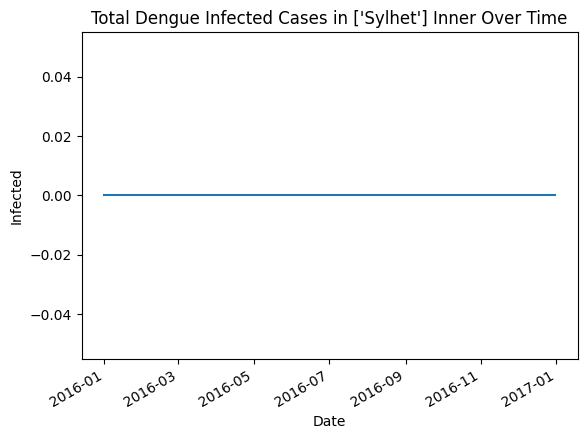

In [42]:
visual('CSV/2016/Sylhet_Dengue.csv')

In [17]:
import pandas as pd
deases_file = 'CSV/2020/Sylhet_Dengue_2020.csv'
deases_file = pd.read_csv(deases_file)
deases_file['Area'].unique().count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'